In [350]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [351]:
data = pd.read_csv('nt-1012.csv',header=0)
data.head()
list(data)
print (data.shape)

(30000, 26)


In [352]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,PAY_5,PAY_4,...,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,TARGET
0,0,1,20000,2,2,1,24,1,1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,1,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [353]:
# change the anamoly in data
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3

In [354]:
# one hot encoding
df1 = pd.get_dummies(data.SEX)
df1.rename(columns = {1:'Male',2:'Female'}, inplace = True)
df2 = pd.get_dummies(data.MARRIAGE)
df2.rename(columns = {1:'Married',2:'Single',3:'Others'}, inplace = True)
df3 = pd.get_dummies(data.EDUCATION)
df3.rename(columns = {1:'GS',2:'HS',3:'Univ',4:'Other'}, inplace = True)
data = pd.concat([data,df1,df2,df3], axis = 1)
data.drop(labels=['SEX','MARRIAGE','EDUCATION'], axis =1, inplace = True)

In [355]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [356]:
print (list(data))
data.to_csv("final_one_hot.csv")

['ID', 'LIMIT_BAL', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'TARGET', 'Male', 'Female', 'Married', 'Single', 'Others', 'GS', 'HS', 'Univ', 'Other']


In [357]:
#data['TOTAL_MONTHS_DELAYED'] = data['PAY_1'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6'] 
#data['TOTAL_BILL_AMT'] = data['BILL_AMT6'] + data['BILL_AMT5'] + data['BILL_AMT4'] + data['BILL_AMT3'] + data['BILL_AMT2'] + data['BILL_AMT1']
#data['TOTAL_PAIED_AMT'] = data['PAY_AMT6'] + data['PAY_AMT5'] + data['PAY_AMT4'] + data['PAY_AMT3'] + data['PAY_AMT2'] + data['PAY_AMT1']

In [358]:
print (data['TARGET'].value_counts())
print (list(data))

0    23364
1     6636
Name: TARGET, dtype: int64
['ID', 'LIMIT_BAL', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'TARGET', 'Male', 'Female', 'Married', 'Single', 'Others', 'GS', 'HS', 'Univ', 'Other']


In [359]:
X = data.iloc[:, data.columns != 'TARGET']
y = data.iloc[:, data.columns == 'TARGET']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [361]:
print("Original number transactions train dataset: ", len(X_train))
print("Original number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))


('Original number transactions train dataset: ', 21000)
('Original number transactions test dataset: ', 9000)
('Total number of transactions: ', 30000)


In [362]:
print(type(y_train))
print(type(y_test))
print(type(X_train))
print(type(X_test))
unique_train, counts_train = np.unique(y_train, return_counts=True)
print (dict(zip(unique_train, counts_train)))
unique_test, counts_test = np.unique(y_test, return_counts=True)
print (dict(zip(unique_test, counts_test)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{0: 16304, 1: 4696}
{0: 7060, 1: 1940}


In [363]:
train_data = pd.concat([X_train,y_train],axis=1)
train_data.head()

,ID,LIMIT_BAL,AGE,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_1,BILL_AMT6,...,Male,Female,Married,Single,Others,GS,HS,Univ,Other,TARGET
15925,15926,30000,31,-1,-1,-1,-1,-1,-1,0,...,0,1,0,1,0,0,1,0,0,0
10062,10063,200000,31,1,1,1,0,0,0,29070,...,1,0,1,0,0,0,1,0,0,0
19376,19377,500000,38,-1,-1,-1,-1,-1,-1,2252,...,0,1,0,1,0,0,0,0,1,0
6384,6385,20000,22,0,0,0,0,0,0,17807,...,0,1,0,1,0,0,1,0,0,0
15976,15977,50000,48,1,1,0,0,0,0,18704,...,0,1,1,0,0,0,1,0,0,1


In [375]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
#nm1 = NearMiss(random_state=0, version=1)
#X_resampled_nm1, y_resampled = nm1.fit_sample(X_train, y_train)

print(sorted(Counter(y_resampled).items()))
X_undersample = pd.DataFrame(X_resampled)
y_undersample = pd.DataFrame(y_resampled)
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,y_undersample,test_size = 0.3,random_state = 0)

[(0, 16304), (1, 16304)]


In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [377]:
def printing_Kfold_scores(x_train_data,y_train_data,algo,c_param_range):
    fold = KFold(len(y_train_data),5,shuffle=False) 
    print (fold)
    # Different C parameters

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('Hyper parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            if algo == "DTC":
                lr = DecisionTreeClassifier(max_depth= c_param)
            elif algo == "RFC":
                lr = RandomForestClassifier(n_estimators= c_param,max_depth=11)
            elif algo == "LR":
                lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = pd.DataFrame(lr.predict_proba(x_train_data.iloc[indices[1],:].values))[1]

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
           # recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_acc = roc_auc_score(y_train_data.iloc[indices[1],:],y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with Hyper parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [378]:
#c_param_range = [0.01,0.1,1,10,100]
c_param_range = [20,22,24,26,28]
algo = "RFC"
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample,algo,c_param_range)

sklearn.cross_validation.KFold(n=22825, n_folds=5, shuffle=False, random_state=None)
-------------------------------------------
('Hyper parameter: ', 20)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.85431183757020746)
('Iteration ', 2, ': recall score = ', 0.84474199646198167)
('Iteration ', 3, ': recall score = ', 0.84527679385649146)
('Iteration ', 4, ': recall score = ', 0.85529808265203966)
('Iteration ', 5, ': recall score = ', 0.85387963683507961)

('Mean recall score ', 0.85070166947516002)

-------------------------------------------
('Hyper parameter: ', 22)
-------------------------------------------



C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Iteration ', 1, ': recall score = ', 0.85920633097217902)
('Iteration ', 2, ': recall score = ', 0.84339019013777383)
('Iteration ', 3, ': recall score = ', 0.84769791216702661)
('Iteration ', 4, ': recall score = ', 0.85492723567747519)
('Iteration ', 5, ': recall score = ', 0.8507776319340653)

('Mean recall score ', 0.85119986017770388)

-------------------------------------------
('Hyper parameter: ', 24)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.86113298906610236)
('Iteration ', 2, ': recall score = ', 0.84218013872594488)
('Iteration ', 3, ': recall score = ', 0.84520249580033591)
('Iteration ', 4, ': recall score = ', 0.8544949647733765)
('Iteration ', 5, ': recall score = ', 0.85588931754740449)

('Mean recall score ', 0.85177998118263287)

-------------------------------------------
('Hyper parameter: ', 26)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.85872310564337262)
('Iteration ', 2, ':

In [379]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [380]:
lr =  RandomForestClassifier(n_estimators= 28,max_depth=11)
lr.fit(X_train_undersample,y_train_undersample.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [381]:
y_pred = pd.DataFrame(lr.predict_proba(X_test))[1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) # compute area under the curve
roc=roc_auc_score(y_test,y_pred)
y2 = np.where(y_pred > 0.47 , 1 ,0 )
print (classification_report(y_test,y2))
print (roc_auc)

             precision    recall  f1-score   support

          0       0.88      0.80      0.84      7060
          1       0.46      0.62      0.52      1940

avg / total       0.79      0.76      0.77      9000

0.772552605064


(0.0, 1.0)

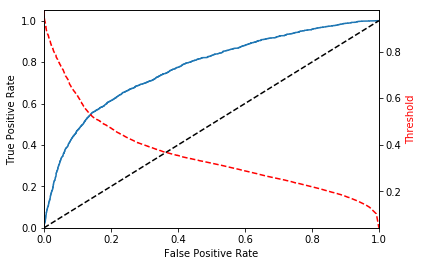

In [382]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title("Receiver operating characteristic") 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
#plt.savefig('roc_and_threshold.png')
#plt.close()

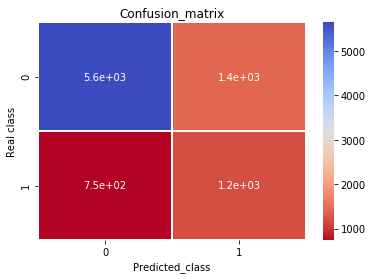

In [383]:
cnf_matrix = confusion_matrix(y_test,y2)
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [338]:
# Number of data points in the minority class
number_records_default = len(data[data.TARGET == 1])
print ("Number of records default : ", number_records_default)
default_indices = np.array(data[data.TARGET == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.TARGET == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_default, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([default_indices,random_normal_indices])
print ("Unser sample indices", under_sample_indices)
# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'TARGET']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'TARGET']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.TARGET == 0])/float(len(under_sample_data)))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.TARGET == 1])/float(len(under_sample_data)))
print("Total number of transactions in resampled data: ", len(under_sample_data))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
print ()                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

('Number of records default : ', 6636)
('Unser sample indices', array([    0,     1,    13, ...,  4288,  5353, 19290], dtype=int64))
('Percentage of normal transactions: ', 0.5)
('Percentage of fraud transactions: ', 0.5)
('Total number of transactions in resampled data: ', 13272)

('Number transactions train dataset: ', 9290)
('Number transactions test dataset: ', 3982)
('Total number of transactions: ', 13272)


In [294]:
# Use this C_parameter to build the model with the sampling dataset and predict the classes in the whole test dataset
#lr = LogisticRegression(C = best_c, penalty = 'l1')
#lr =  RandomForestClassifier(n_estimators= 26,max_depth=6)
#lr.fit(X_train_undersample,y_train_undersample.values.ravel())
#y_pred = lr.predict(X_test)

# Compute and plot confusion matrix
#cnf_matrix = confusion_matrix(y_test,y_pred)

#print("the recall for this model is :",cnf_matrix[1,1]/float((cnf_matrix[1,1]+cnf_matrix[1,0])))
#print ("Accuracy for this model is :", accuracy_score(y_test,y_pred))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
#sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
#plt.title("Confusion_matrix")
#plt.xlabel("Predicted_class")
#plt.ylabel("Real class")
#plt.show()

In [296]:
#lr = LogisticRegression(C = best_c, penalty = 'l1') # l2 is about 90% recall
#lr = RandomForestClassifier(n_estimators= 26,max_depth=9)
#lr.fit(X_train_undersample,y_train_undersample.values.ravel())
#y_pred_undersample = lr.predict(X_test_undersample.values)


# Compute and plot confusion matrix
#cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
#print("the recall for this model is :",cnf_matrix[1,1]/float((cnf_matrix[1,1]+cnf_matrix[1,0])))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
#sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
#plt.title("Confusion_matrix")
#plt.xlabel("Predicted_class")
#plt.ylabel("Real class")
#plt.show()